In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

df_drive_path = "Data Studies/datasets/equipment_anomaly_data.csv"
path = "gdrive/MyDrive/" + df_drive_path

Mounted at /content/gdrive


# Industrial Equipment Fault Classification Study

by **Diego Kurashima**

This notebook is my study on the dataset [Industrial Equipment 🖥️Monitoring 🖲️Dataset](https://www.kaggle.com/datasets/dnkumars/industrial-equipment-monitoring-dataset), which was provided on kaggle.

Our goal is to create a Machine Learning Model which predicts a Faulty condition of industrial equipments based on Temperature, Pressure, Humidity, Vibrations, besides the equipment Type and Location

## Data Import

### Import

First, let's load the data from the database of reference which is avaiable in [Industrial Equipment 🖥️Monitoring 🖲️Dataset](https://www.kaggle.com/datasets/dnkumars/industrial-equipment-monitoring-dataset) from kaggle.

In [3]:
df_raw = pd.read_csv(path)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   float64
dtypes: float64(5), object(2)
memory usage: 419.7+ KB


### Import Preprocessing

In [4]:
df = df_raw.copy()

In [5]:
df['faulty'] = df['faulty'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   bool   
dtypes: bool(1), float64(4), object(2)
memory usage: 367.2+ KB


## Data Exploratory Analysis (EDA)

The dataset consists of:
*   **Target**: 'faulty'
*   **Operational Data**: 'temperature', 'humidity', 'pressure' and 'vibration'
*   **Meta-Data**: 'equipment' and 'location'

The target is the variable we want to predict, the operational data are the data from the equipment operations conditions and the meta-data refers to data which describes the equipments.





### Overall Analysis

First I'll analyse which **equipments** are added to the dataset.

In [6]:
equips = [equip for equip in df['equipment'].unique()]
print(f"Equipments: {equips}")

Equipments: ['Turbine', 'Compressor', 'Pump']


equipment
Compressor    2573
Turbine       2565
Pump          2534
Name: count, dtype: int64


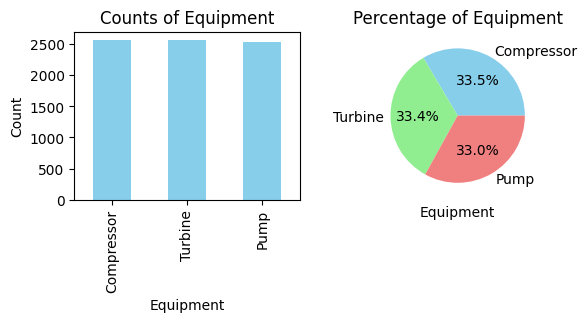

In [7]:
df_equip_counts = df['equipment'].value_counts()
print(df_equip_counts)

plt.figure(1)

plt.subplot(2,2,1)
df_equip_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Equipment')
plt.ylabel('Count')
plt.title('Counts of Equipment')

plt.subplot(2,2,2)
df_equip_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Equipment')
plt.ylabel('')
plt.title('Percentage of Equipment')

plt.show()



Each equipment has similar sampling sizes.

Now, let's check on the **locations** of the data and its distribution.

Locations: ['Atlanta', 'Chicago', 'San Francisco', 'New York', 'Houston']
location
Atlanta          1564
Chicago          1553
Houston          1548
New York         1526
San Francisco    1481
Name: count, dtype: int64


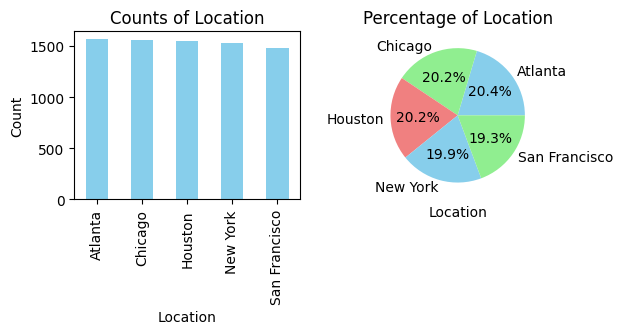

In [8]:
locations = [loc for loc in df['location'].unique()]
print(f"Locations: {locations}")

df_location_counts = df['location'].value_counts()
print(df_location_counts)

plt.figure(1)

plt.subplot(2,2,1)
df_location_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Counts of Location')

plt.subplot(2,2,2)
df_location_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Location')
plt.ylabel('')
plt.title('Percentage of Location')

plt.show()

So, we have data from five cities in USA: Atlanta, Chicago, San Francisco, New York and Houston. Each location also appears similar times.

Now, we'll check both **Location and Equipments** together.

equipment      Compressor  Pump  Turbine
location                                
Atlanta               520   504      540
Chicago               535   517      501
Houston               505   516      527
New York              520   508      498
San Francisco         493   489      499


<Axes: xlabel='location'>

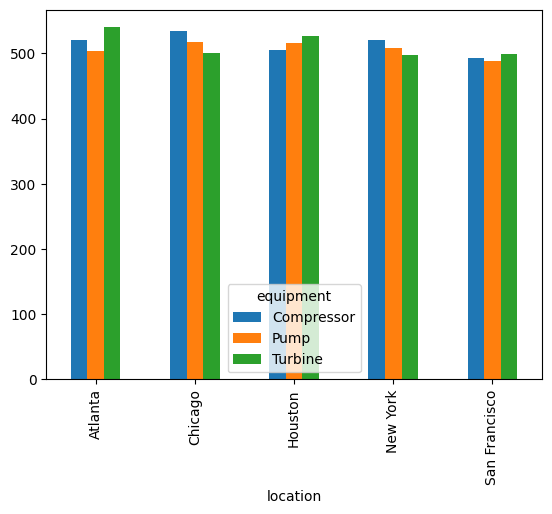

In [9]:
#df_location_equip_counts = df.groupby(['location'])['equipment'].value_counts()
df_location_equip_counts = df.pivot_table(index=['location'],columns='equipment',aggfunc='size')
print(df_location_equip_counts)
df_location_equip_counts.plot(kind='bar')

#sns.catplot(data=df, kind='count', x="equipment", hue='location')

We can see that the distribution of equipments for each location is similar as well.

Let's check the **temperature** data. From the source, it is given in **°C**.

In [10]:
print(df['temperature'].describe())

count    7672.000000
mean       70.922478
std        16.200059
min        10.269385
25%        62.777057
50%        70.156900
75%        77.568387
max       149.690420
Name: temperature, dtype: float64


Text(0.5, 1.0, 'Percentage')

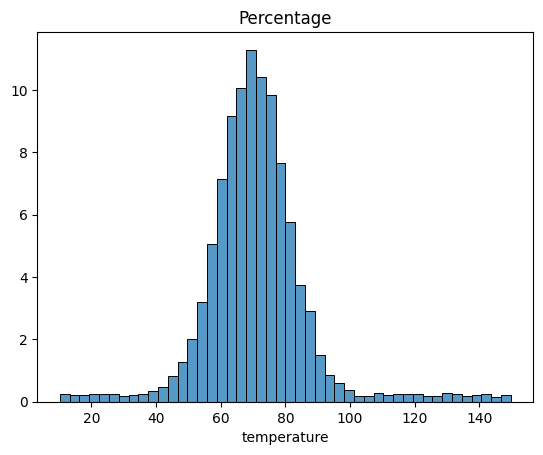

In [11]:
sns.histplot(data=df, x="temperature", stat="percent", binwidth=3)
plt.xlabel('temperature')
plt.ylabel('')
plt.title('Percentage')

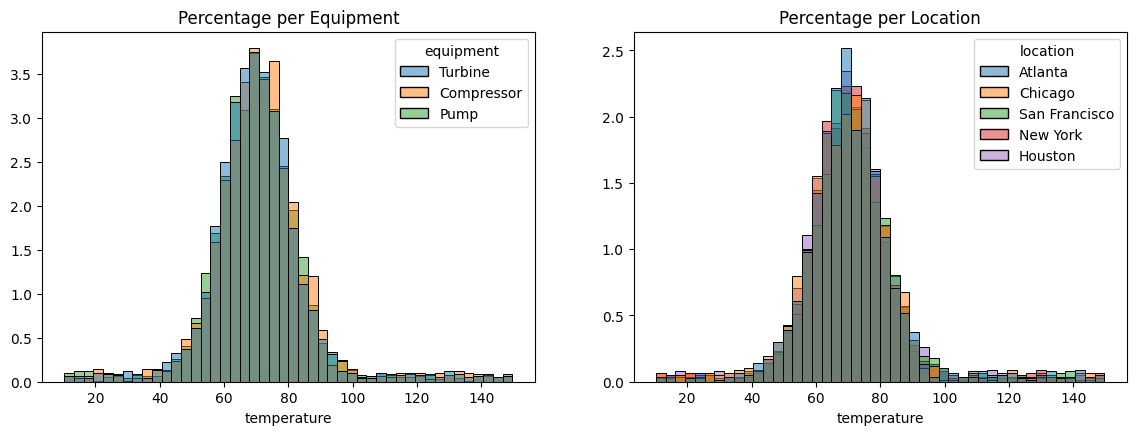

In [12]:
plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
sns.histplot(data=df, x="temperature", hue='equipment', stat="percent", binwidth=3)
plt.xlabel('temperature')
plt.ylabel('')
plt.title('Percentage per Equipment')

plt.subplot(2,2,2)
sns.histplot(data=df, x="temperature", hue='location', stat="percent", binwidth=3)
plt.xlabel('temperature')
plt.ylabel('')
plt.title('Percentage per Location')

plt.show()

Now, let's analyse the **pressure** data, which is in **bars**

In [13]:
print(df['pressure'].describe())

count    7672.000000
mean       35.738048
std        10.381593
min         3.620798
25%        29.485682
50%        35.227544
75%        41.159913
max        79.887734
Name: pressure, dtype: float64


Text(0.5, 1.0, 'Percentage')

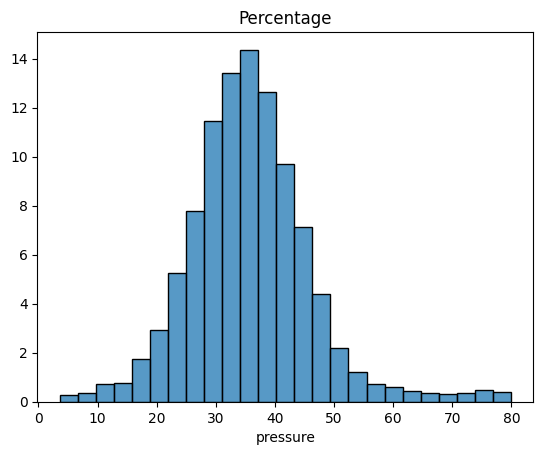

In [14]:
sns.histplot(data=df, x="pressure", stat="percent", binwidth=3)
plt.xlabel('pressure')
plt.ylabel('')
plt.title('Percentage')

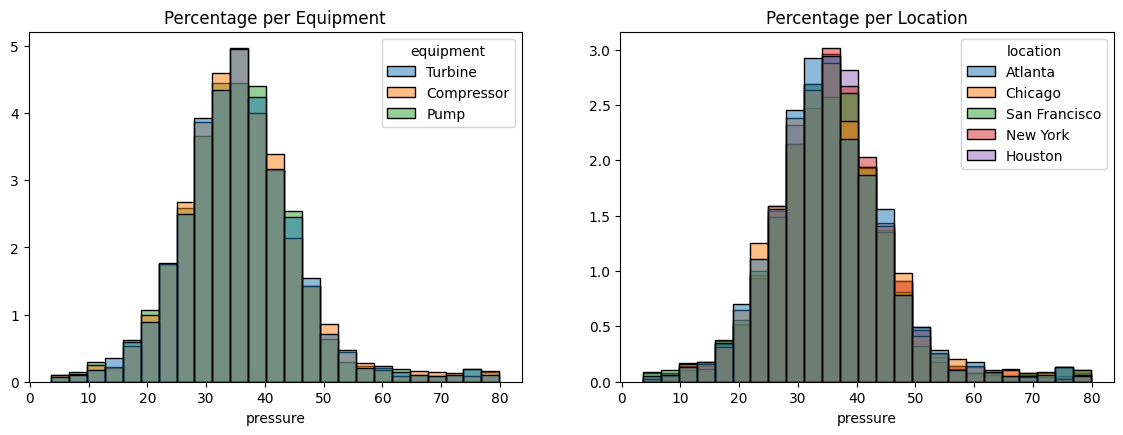

In [15]:
plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
sns.histplot(data=df, x="pressure", hue='equipment', stat="percent", binwidth=3)
plt.xlabel('pressure')
plt.ylabel('')
plt.title('Percentage per Equipment')

plt.subplot(2,2,2)
sns.histplot(data=df, x="pressure", hue='location', stat="percent", binwidth=3)
plt.xlabel('pressure')
plt.ylabel('')
plt.title('Percentage per Location')

plt.show()

Let's see **vibration**, which data is normalized.

In [16]:
print(df['vibration'].describe())

count    7672.000000
mean        1.611809
std         0.728560
min        -0.428188
25%         1.170906
50%         1.533113
75%         1.924700
max         4.990537
Name: vibration, dtype: float64


Text(0.5, 1.0, 'Percentage')

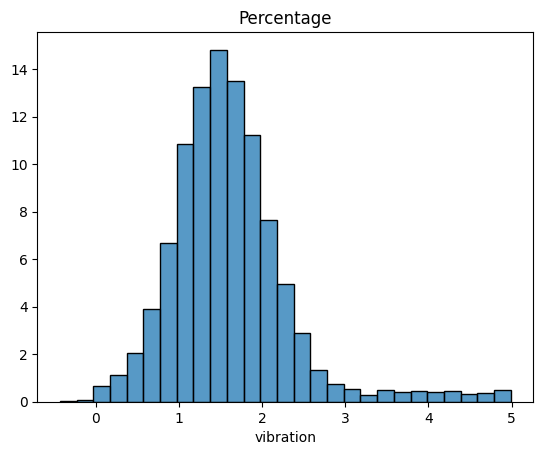

In [17]:
sns.histplot(data=df, x='vibration', stat="percent", binwidth=0.2)
plt.xlabel('vibration')
plt.ylabel('')
plt.title('Percentage')

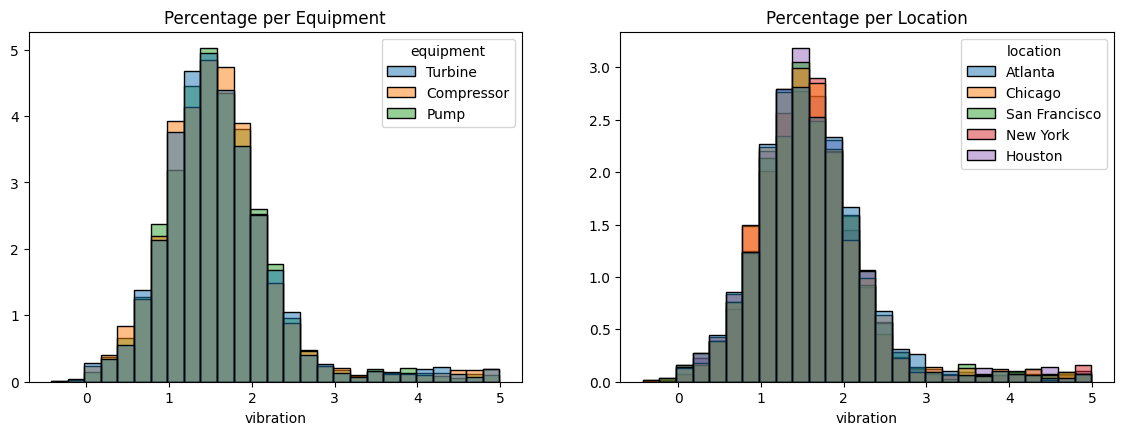

In [18]:
plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
sns.histplot(data=df, x='vibration', hue='equipment', stat="percent", binwidth=0.2)
plt.xlabel('vibration')
plt.ylabel('')
plt.title('Percentage per Equipment')

plt.subplot(2,2,2)
sns.histplot(data=df, x='vibration', hue='location', stat="percent", binwidth=0.2)
plt.xlabel('vibration')
plt.ylabel('')
plt.title('Percentage per Location')

plt.show()

There are some negative values for vibration. From the datasource information, it is said that the data is normalized, but we have no prior information about the units or the measurements from where they came from.

In [19]:
df_neg_vib = df[df['vibration'] < 0]
#print(df_neg_vib.describe())
print(df_neg_vib)

      temperature   pressure  vibration   humidity   equipment       location  \
351     68.748256  25.952101  -0.167951  50.846200     Turbine       New York   
567     65.354189  39.052701  -0.005261  48.655373     Turbine       New York   
925     75.414627  36.832759  -0.317600  28.745464        Pump        Chicago   
1685    80.240625  33.645804  -0.047145  36.778821     Turbine  San Francisco   
1893    71.376619  35.443175  -0.099632  34.219714        Pump  San Francisco   
2394    71.895816  33.898072  -0.153950  35.942537        Pump       New York   
2522    71.664522  46.135367  -0.125167  50.579747  Compressor        Houston   
4417    64.375332  33.283699  -0.164752  46.207905     Turbine  San Francisco   
6792    92.020139  27.206661  -0.167446  50.547778  Compressor       New York   
7441    64.332949  35.921919  -0.428188  43.921578     Turbine       New York   

      faulty  
351    False  
567    False  
925    False  
1685   False  
1893   False  
2394   False  
252

All negative vibrations led to no faulty condition.

Now, the same analysis for **humidity**.

In [20]:
print(df['humidity'].describe())

count    7672.000000
mean       50.016574
std        11.841479
min        10.215077
25%        42.612817
50%        50.024744
75%        57.340513
max        89.984718
Name: humidity, dtype: float64


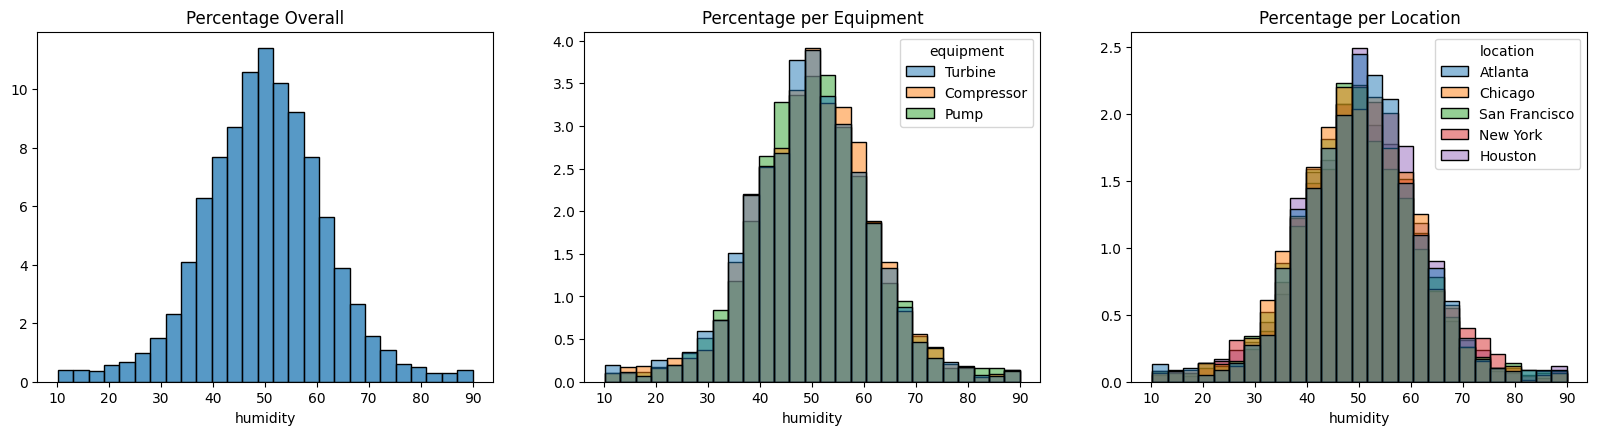

In [21]:
plt.figure(figsize=(20, 10))

plt.subplot(2,3,1)
sns.histplot(data=df, x='humidity', stat="percent", binwidth=3)
plt.xlabel('humidity')
plt.ylabel('')
plt.title('Percentage Overall')

plt.subplot(2,3,2)
sns.histplot(data=df, x='humidity', hue='equipment', stat="percent", binwidth=3)
plt.xlabel('humidity')
plt.ylabel('')
plt.title('Percentage per Equipment')

plt.subplot(2,3,3)
sns.histplot(data=df, x='humidity', hue='location', stat="percent", binwidth=3)
plt.xlabel('humidity')
plt.ylabel('')
plt.title('Percentage per Location')

plt.show()

Lastly, we'll also analyse the **faulty** column, which is our **target**.

In [22]:
print(df['faulty'].describe())

count      7672
unique        2
top       False
freq       6905
Name: faulty, dtype: object


faulty
False    6905
True      767
Name: count, dtype: int64


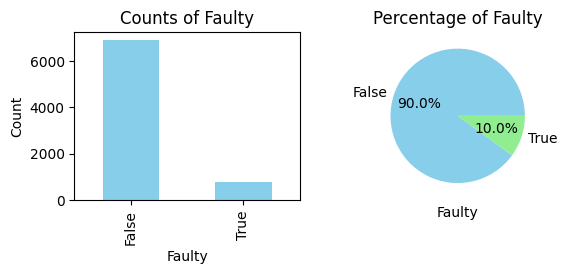

In [23]:
df_faulty_counts = df['faulty'].value_counts()
print(df_faulty_counts)

plt.figure(1)

plt.subplot(2,2,1)
df_faulty_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Faulty')
plt.ylabel('Count')
plt.title('Counts of Faulty')

plt.subplot(2,2,2)
df_faulty_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Faulty')
plt.ylabel('')
plt.title('Percentage of Faulty')

plt.show()

faulty         False  True 
location                   
Atlanta         1423    141
Chicago         1393    160
Houston         1395    153
New York        1383    143
San Francisco   1311    170


<Axes: xlabel='location'>

<Figure size 500x500 with 0 Axes>

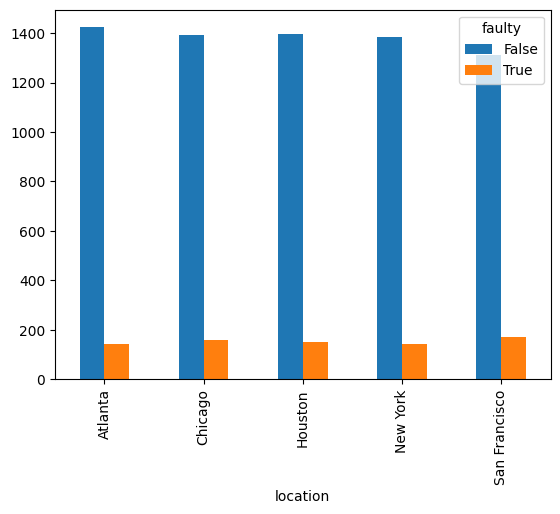

In [24]:
df_location_faulty_counts = df.pivot_table(index=['location'], columns='faulty',aggfunc='size')
print(df_location_faulty_counts)

plt.figure(figsize = (5,5))
df_location_faulty_counts.plot(kind='bar')

faulty      False  True 
equipment               
Compressor   2316    257
Pump         2282    252
Turbine      2307    258


<Axes: xlabel='equipment'>

<Figure size 400x400 with 0 Axes>

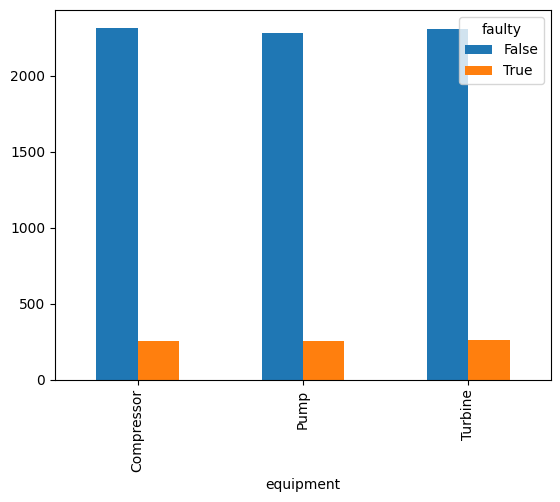

In [25]:
df_equip_faulty_counts = df.pivot_table(index=['equipment'], columns='faulty',aggfunc='size')
print(df_equip_faulty_counts)

plt.figure(figsize = (4,4))
df_equip_faulty_counts.plot(kind='bar')

**Overall Analysis Conclusions:**

A first overall analysis concludes the dataset is well distributed, with no highly skewed variables.

### Operational Data and Faulty

**faulty** is our target variable, so let's check the correlation of our operational values **temperature**, **humidity**, **pressure** and **vibration**, which are numerical columns, with our target.

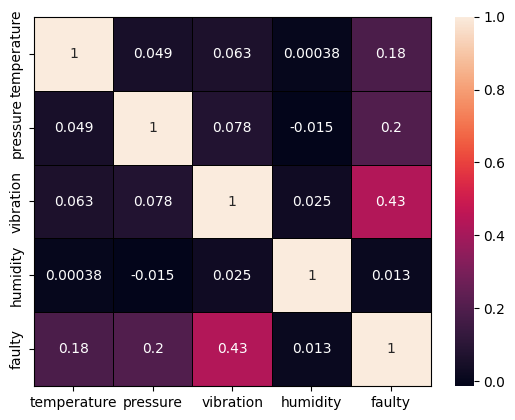

In [26]:
df_corr = df.drop(['equipment', 'location'], axis=1)

plt.figure(1)
correlation = df_corr.corr()
ax = sns.heatmap(correlation, annot=True, linewidth= .5, linecolor='black')

# Set as Visible
for _, spine in ax.spines.items():
    spine.set_visible(True)

A direct analysis from the correlation matrix shows that **vibration** has a higher correlation with our target among the columns. Let's check it.

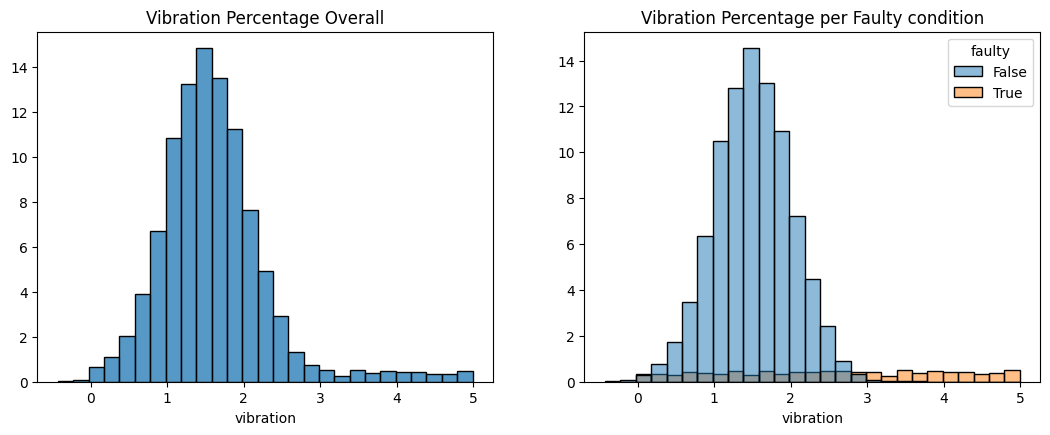

In [27]:
plt.figure(figsize=(20, 10))

plt.subplot(2,3,1)
sns.histplot(data=df, x='vibration', stat="percent", binwidth=0.2)
plt.xlabel('vibration')
plt.ylabel('')
plt.title('Vibration Percentage Overall')

plt.subplot(2,3,2)
sns.histplot(data=df, x='vibration', hue='faulty', stat="percent", binwidth=0.2)
plt.xlabel('vibration')
plt.ylabel('')
plt.title('Vibration Percentage per Faulty condition')

plt.show()

Let's also check it for **temperature**, **humidity** and **pressure**.

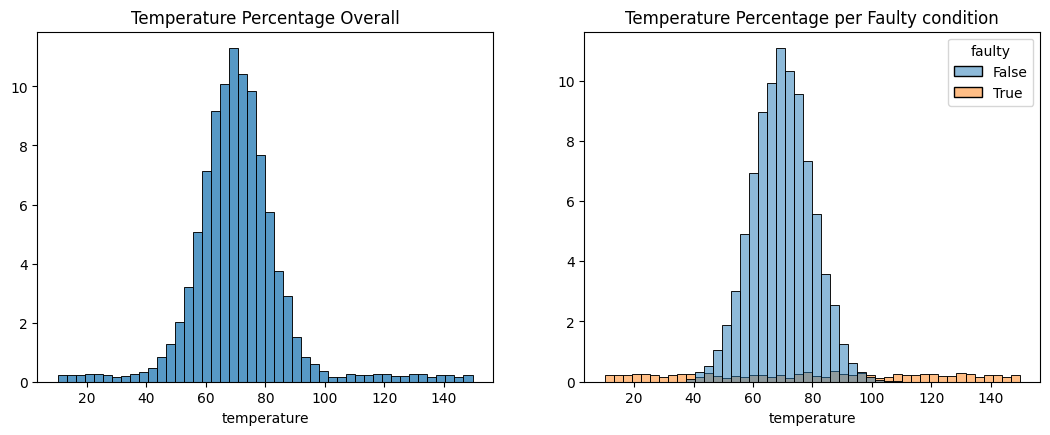

In [28]:
plt.figure(figsize=(20, 10))

plt.subplot(2,3,1)
sns.histplot(data=df, x='temperature', stat="percent", binwidth=3)
plt.xlabel('temperature')
plt.ylabel('')
plt.title('Temperature Percentage Overall')

plt.subplot(2,3,2)
sns.histplot(data=df, x='temperature', hue='faulty', stat="percent", binwidth=3)
plt.xlabel('temperature')
plt.ylabel('')
plt.title('Temperature Percentage per Faulty condition')

plt.show()

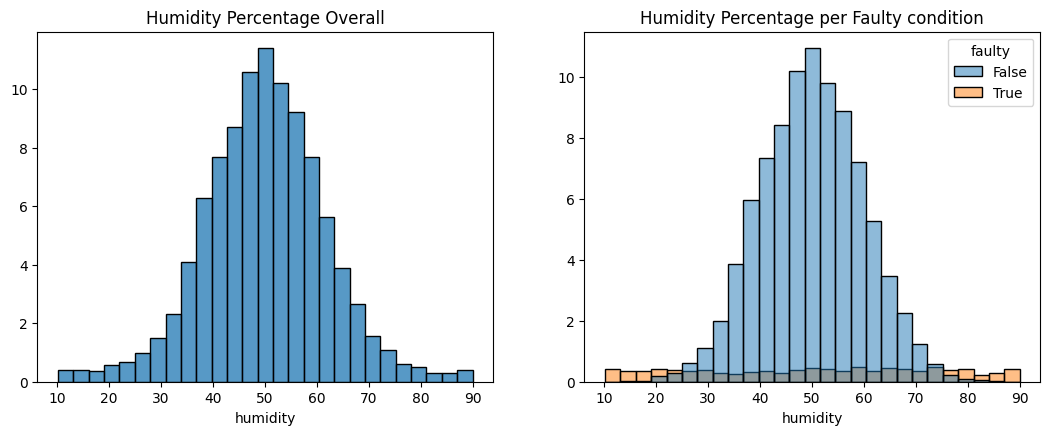

In [29]:
plt.figure(figsize=(20, 10))

plt.subplot(2,3,1)
sns.histplot(data=df, x='humidity', stat="percent", binwidth=3)
plt.xlabel('humidity')
plt.ylabel('')
plt.title('Humidity Percentage Overall')

plt.subplot(2,3,2)
sns.histplot(data=df, x='humidity', hue='faulty', stat="percent", binwidth=3)
plt.xlabel('humidity')
plt.ylabel('')
plt.title('Humidity Percentage per Faulty condition')

plt.show()

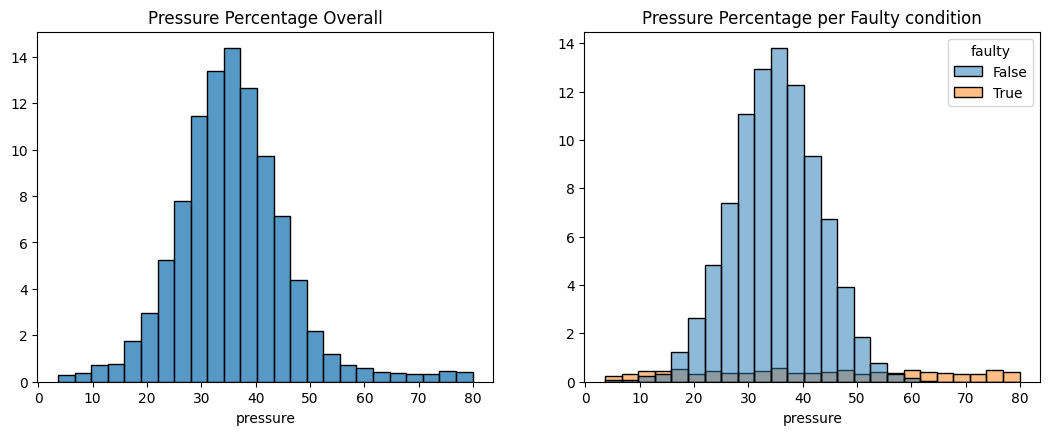

In [30]:
plt.figure(figsize=(20, 10))

plt.subplot(2,3,1)
sns.histplot(data=df, x='pressure', stat="percent", binwidth=3)
plt.xlabel('pressure')
plt.ylabel('')
plt.title('Pressure Percentage Overall')

plt.subplot(2,3,2)
sns.histplot(data=df, x='pressure', hue='faulty', stat="percent", binwidth=3)
plt.xlabel('pressure')
plt.ylabel('')
plt.title('Pressure Percentage per Faulty condition')

plt.show()

For the **temperature**, **humidity**, **pressure** and also **vibration**, it seems that there is a limiar value in which the equipment tends to be faulty. Let's check the percentage of faulty for each bin analysed.

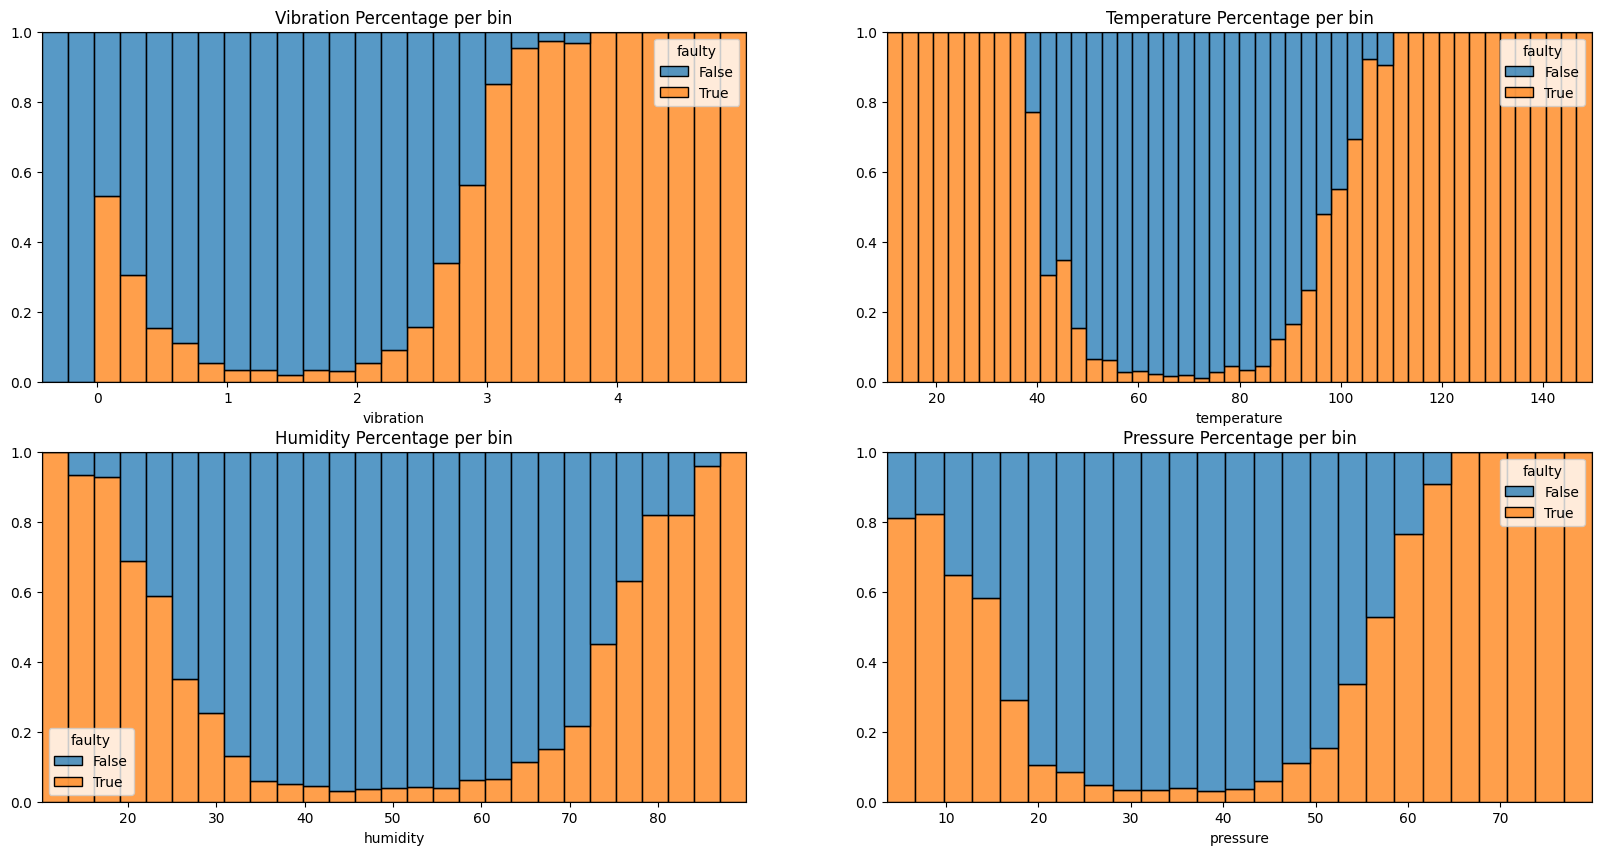

In [31]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
ax = sns.histplot(data=df, x='vibration', hue='faulty', stat="percent", multiple='fill', binwidth=0.2)
plt.xlabel('vibration')
plt.ylabel('')
plt.title('Vibration Percentage per bin')

plt.subplot(2,2,2)
ax = sns.histplot(data=df, x='temperature', hue='faulty', stat="percent", multiple='fill', binwidth=3)
plt.xlabel('temperature')
plt.ylabel('')
plt.title('Temperature Percentage per bin')

plt.subplot(2,2,3)
ax = sns.histplot(data=df, x='humidity', hue='faulty', stat="percent", multiple='fill', binwidth=3)
plt.xlabel('humidity')
plt.ylabel('')
plt.title('Humidity Percentage per bin')

plt.subplot(2,2,4)
ax = sns.histplot(data=df, x='pressure', hue='faulty', stat="percent", multiple='fill', binwidth=3)
plt.xlabel('pressure')
plt.ylabel('')
plt.title('Pressure Percentage per bin')

plt.show()

Now, we could see more clearly that there is liminar bin in which the faulty conditions increase for each variable.

## Data Engineering and Preprocessing

In [32]:
# Copy df
df_train = df.copy()
df_train.head(5)

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,False
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,False
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,False
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,False
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,False


### Negative Vibration

Since we have no prior information about the vibration measures, units or how it has been normalized, we'll assume negative values for vibration are only some noises or mismeasurements.

In [33]:
def transform_negative_to_zero(x):
  if x < 0:
    return 0
  else:
    return x

df_train['vibration'] = df_train['vibration'].apply(lambda x : transform_negative_to_zero(x))
print(df_train[df_train['vibration'] < 0])

Empty DataFrame
Columns: [temperature, pressure, vibration, humidity, equipment, location, faulty]
Index: []


### Operational Data

We'll transform the operational data (which is numerical) to a common scale. We'll use **Min Max Scaler**

In [34]:
from sklearn.preprocessing import MinMaxScaler
operational_data_columns = ['vibration', 'temperature', 'pressure', 'humidity']
standard_scaler = MinMaxScaler()

df_train[operational_data_columns] = standard_scaler.fit_transform(df_train[operational_data_columns])
df_train[operational_data_columns].head(5)

,vibration,temperature,pressure,humidity
0,0.121533,0.343641,0.280705,0.444779
1,0.468506,0.469594,0.253494,0.396797
2,0.278366,0.438164,0.310174,0.611001
3,0.354809,0.440017,0.375289,0.380471
4,0.069211,0.403364,0.545147,0.414177


### Meta Data (Equipment and Location)

At this point, we'll test whether the Meta Data ('Equipment' and 'Location') really matters for the prediction. Let's create two training dataframes, one with 'Equipment' and 'Location', where we'll use **One-Hot Encoding**, and another without them.

In [35]:
from sklearn.preprocessing import OneHotEncoder
meta_data_columns = ['equipment', 'location']
one_hot_encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = one_hot_encoder.fit_transform(df_train[meta_data_columns])
df_one_hot = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(meta_data_columns))

df_train_with_meta_data = pd.concat([df_train, df_one_hot], axis=1).drop(['equipment', 'location'], axis=1)
print(df_train_with_meta_data.head(5))

   temperature  pressure  vibration  humidity  faulty  equipment_Compressor  \
0     0.343641  0.280705   0.121533  0.444779   False                   0.0   
1     0.469594  0.253494   0.468506  0.396797   False                   1.0   
2     0.438164  0.310174   0.278366  0.611001   False                   0.0   
3     0.440017  0.375289   0.354809  0.380471   False                   0.0   
4     0.403364  0.545147   0.069211  0.414177   False                   0.0   

   equipment_Pump  equipment_Turbine  location_Atlanta  location_Chicago  \
0             0.0                1.0               1.0               0.0   
1             0.0                0.0               0.0               1.0   
2             0.0                1.0               0.0               0.0   
3             1.0                0.0               1.0               0.0   
4             1.0                0.0               0.0               0.0   

   location_Houston  location_New York  location_San Francisco  
0  

In [36]:
df_train = df_train.drop(['equipment', 'location'], axis=1)
print(df_train.head(5))

   temperature  pressure  vibration  humidity  faulty
0     0.343641  0.280705   0.121533  0.444779   False
1     0.469594  0.253494   0.468506  0.396797   False
2     0.438164  0.310174   0.278366  0.611001   False
3     0.440017  0.375289   0.354809  0.380471   False
4     0.403364  0.545147   0.069211  0.414177   False


## Training and Validation

Now that we have preprocessed the data, we'll train and validate the model which predicts a faulty condition. So this is a **Classification** problem.

In [37]:
from sklearn.model_selection import train_test_split

X = df_train.drop(['faulty'], axis=1)
y = df_train['faulty']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


X_with_meta_data = df_train_with_meta_data.drop(['faulty'], axis=1)
y_with_meta_data = df_train_with_meta_data['faulty']
X_train_md, X_test_md, y_train_md, y_test_md = train_test_split(X_with_meta_data, y_with_meta_data, test_size = 0.2, random_state = 42)


print(f" Without Meta Data shapes: {X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}")
print(f" With Meta Data shapes: {X_train_md.shape}, {X_test_md.shape}, {y_train_md.shape}, {y_test_md.shape}")

 Without Meta Data shapes: (6137, 4), (1535, 4), (6137,), (1535,)
 With Meta Data shapes: (6137, 12), (1535, 12), (6137,), (1535,)


We'll create some functions to evaluate the model based on **Precision**, **Recall**, **F1-Score** and the **Confusion Matrix**.

In [38]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

def metrics(real, pred):
    class_report = classification_report(real, pred)
    accuracy = accuracy_score(real, pred)
    print(f"Classification Report :\n\n{class_report}")
    print(f"Accuracy : {accuracy:.4f}")

def plot_confusion_matrix(real, pred):
  cm = confusion_matrix(real, pred)
  print(f"Confusion Matrix:")
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

def plot_roc_curve(real, pred):
  # Compute fpr, tpr, thresholds and roc auc
  fpr, tpr, thresholds = roc_curve(real, pred)
  roc_auc = auc(fpr, tpr)

  # Plot ROC curve
  print(f"ROC Curve:")
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")

### Random Forest

We'll start with **Random Forest** performing a **Grid Search** with **Cross-Validation** for training set withou meta data

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
grid_search_rf = GridSearchCV(RandomForestClassifier(),
                              param_grid = {'max_depth': [5, 10, None],
                                            'max_features': [10, 20, 30, 40, None]})
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_estimator_)

RandomForestClassifier(max_depth=10, max_features=20)


Classification Report :

              precision    recall  f1-score   support

       False       0.98      0.99      0.99      1377
        True       0.95      0.85      0.90       158

    accuracy                           0.98      1535
   macro avg       0.97      0.92      0.94      1535
weighted avg       0.98      0.98      0.98      1535

Accuracy : 0.9798
Confusion Matrix:


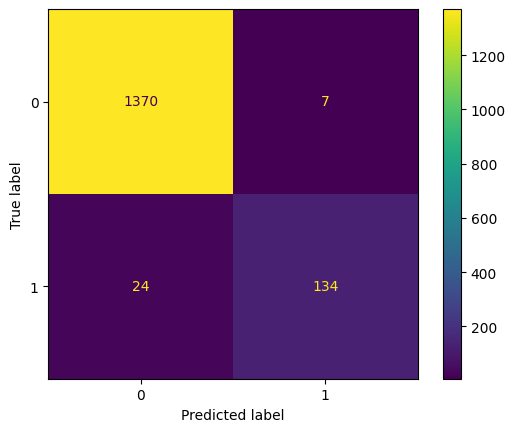

ROC Curve:


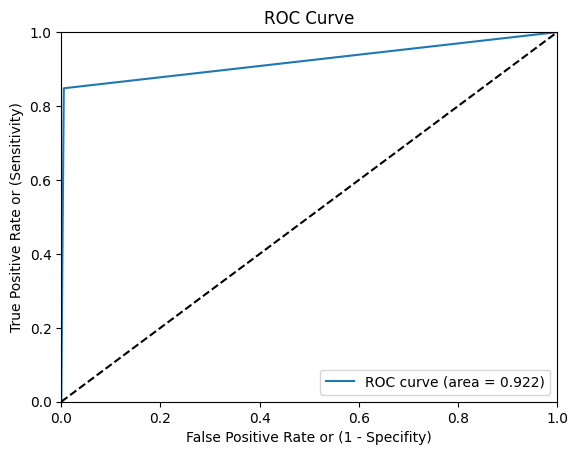

In [40]:
model_rf = RandomForestClassifier(max_depth=10, max_features=20)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

Now, with the meta data

In [ ]:
grid_search_rf_md = GridSearchCV(RandomForestClassifier(),
                              param_grid = {'max_depth': [5, 10, None],
                                            'max_features': [10, 20, 30, 40, None]})
grid_search_rf_md.fit(X_train_md, y_train_md)
print(grid_search_rf_md.best_estimator_)

RandomForestClassifier(max_depth=10, max_features=20)


Classification Report :

              precision    recall  f1-score   support

       False       0.98      0.99      0.99      1377
        True       0.94      0.85      0.90       158

    accuracy                           0.98      1535
   macro avg       0.96      0.92      0.94      1535
weighted avg       0.98      0.98      0.98      1535

Accuracy : 0.9798
Confusion Matrix:


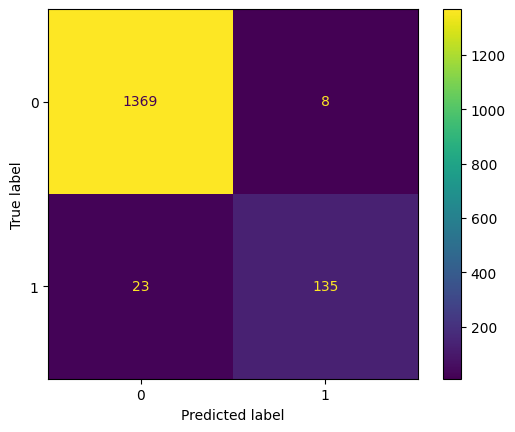

ROC Curve:


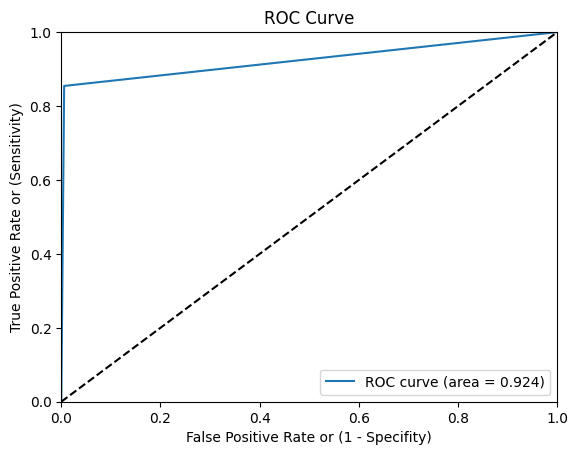

In [41]:
model_rf_md = RandomForestClassifier(max_depth=10, max_features=10)
model_rf.fit(X_train_md, y_train_md)
y_pred_md = model_rf.predict(X_test_md)

metrics(y_test_md, y_pred_md)
plot_confusion_matrix(y_test_md, y_pred_md)
plot_roc_curve(y_test_md, y_pred_md)

For the Random Forest, we could see that the dataset withouth the meta data performed fairly better.

For both dataframes, the Recall for True Faulty (which would be the most critical indicator, since we don't want to miss a faulty equipment) was fairly good with 87%~88%.

From now, I will only use the dataset without meta data to optimize our studies.

### Logistic Regression

Now, let's test **Logistic Regression** with Grid Search CV as well.

In [42]:
from sklearn.linear_model import LogisticRegression


In [ ]:
import warnings
warnings.filterwarnings('ignore')

grid_search_lr = GridSearchCV(LogisticRegression(),
                              param_grid = {'solver': ['liblinear'],
                                            'penalty':['l2', None],
                                            'C' : np.logspace(-4,4,20),
                                            'max_iter': [100, 200, 300, 400, 500]})
grid_search_lr.fit(X_train, y_train)
print(grid_search_lr.best_estimator_)

LogisticRegression(C=29.763514416313132, solver='liblinear')


Classification Report :

              precision    recall  f1-score   support

       False       0.93      1.00      0.96      1377
        True       0.98      0.37      0.54       158

    accuracy                           0.93      1535
   macro avg       0.96      0.69      0.75      1535
weighted avg       0.94      0.93      0.92      1535

Accuracy : 0.9349
Confusion Matrix:


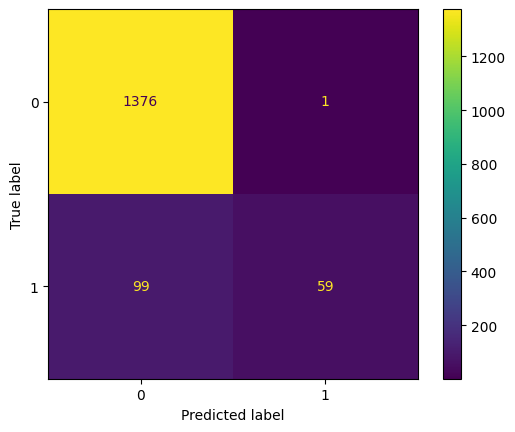

ROC Curve:


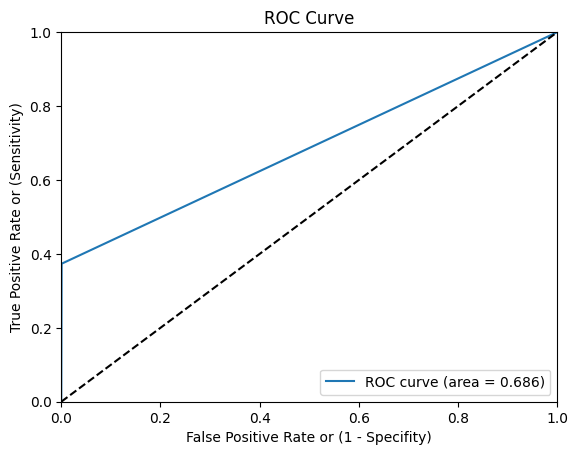

In [43]:
model_lr = LogisticRegression(C=29.763514416313132, solver='liblinear')
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

The Logistic Regression performed pourly if we take the Recall value of only 37% for True Faulty, even though it performed with 93% accuracy. Since predicting a "False Not Faulty condition" would mean not providing maintenance for a faulty equipment, a low recall for this label would be dangerous in a real life problem.

Thus, this model might be discarded.

### XGBoost

Let's test the **XGBoost** (eXtreme Gradient Boosting) algorithm.

Classification Report :

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      1377
        True       0.93      0.88      0.91       158

    accuracy                           0.98      1535
   macro avg       0.96      0.94      0.95      1535
weighted avg       0.98      0.98      0.98      1535

Accuracy : 0.9811
Confusion Matrix:


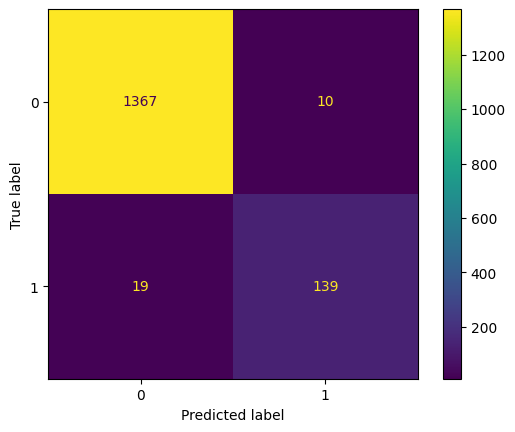

ROC Curve:


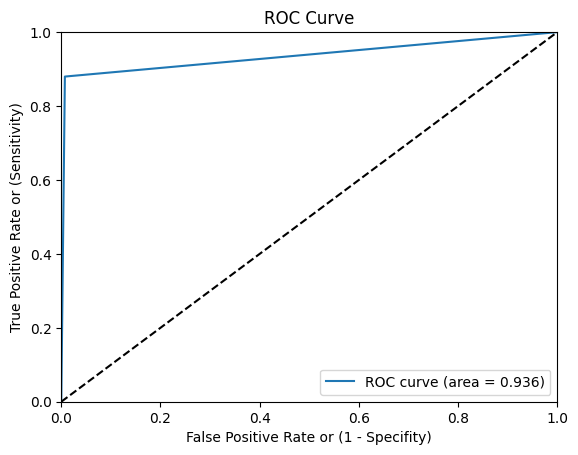

In [44]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(objective="binary:logistic", random_state=42)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

We can see that the XGBoost performed well with 98% Accuracy and 88% Recall for True Faulty.

### LightGBM

Now, as a final test, let's try the **LightGBM** (Light Gradient-Boosting Machine).

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 609, number of negative: 5528
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 6137, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.099234 -> initscore=-2.205763
[LightGBM] [Info] Start training from score -2.205763
Classification Report :

              precision    recall  f1-score   support

       False       0.98      0.99      0.99      1377
        True       0.94      0.87      0.90       158

    accuracy                           0.98      1535
   macro avg       0.96      0.93      0.95      1535
weighted avg       0.98      0.98      0.98      1535

Accuracy : 0.9811
Confusion Matrix:


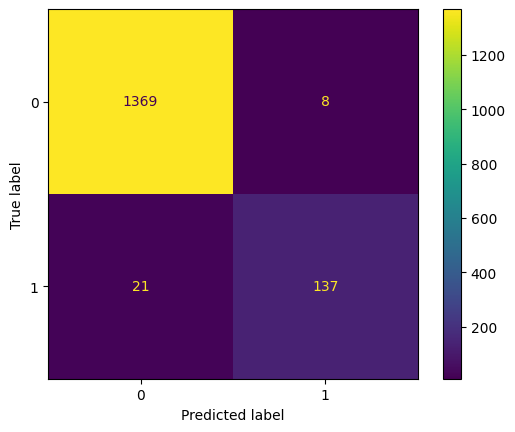

ROC Curve:


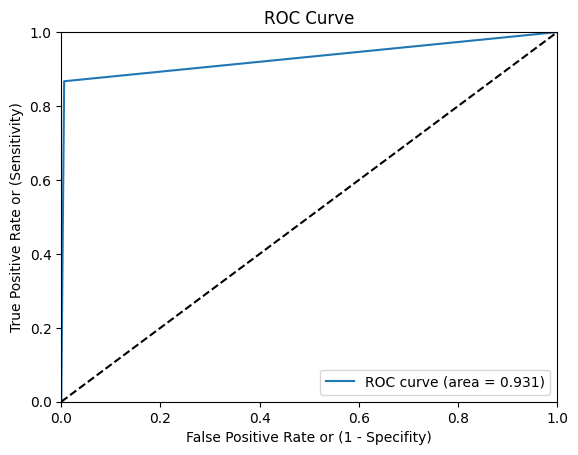

In [45]:
from lightgbm import LGBMClassifier

model_lgbm = LGBMClassifier(metric='auc')
model_lgbm.fit(X_train, y_train)

y_pred = model_lgbm.predict(X_test)

metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

We can see that the LightGBM also performed well with 98% Accuracy and 87% Recall for True Faulty.

## Conclusions

In this dataset I analysed the dataset, visualized trends and created models to predict faulty condition of equipments.

Considering the nature of this dataset, it felt rather simple compared to real faulty detection problems in equipments, since they are mostly based on more complex time series trend analysis, while it was not the case here.

However it still gave a good exercise as an overall data science problem, which included data exploratory analysis, data preprocessing and training machine learning models using Cross-Validation methods and different methods such as Random Forests and Ensembled methods such as XGBoost.

In this problem in particular, analysing the **Recall** was really important giving the results from the Logistic Regression training.